# TAREA 14

## EJERCICIO 1
Resolver con Runge-Kutta orden 4 el sistema:
\begin{align*}
\dot x &= y-y^3\\
\dot y &= -x -y^2
\end{align*}
* Grafiquen muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.
* Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.

### SOLUCIÓN

In [1]:
function rungeKutta(f,list,x0) #Método visto en clase
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        k1 = f(x,t);
        k2 = f(x+(h/2)*k1,t+(h/2));
        k3 = f(x+(h/2)*k2, t+(h/2));
        k4 = f(x+h*k3, t+h);
        x = x+(h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
     end
     return listx
end

rungeKutta (generic function with 1 method)

In [23]:
function numeroaleatorio(m) #resulta un número aleatorio
 return m*(2*rand()-1);
end;


In [24]:
#Definimos la función que queremos resolver:
f(x,t)=[x[2]-x[2]^3,-x[1]-x[2]^2];

In [25]:
tiempoList=0:0.01:50;#Damos un intervalo de [0,50] con h=0.01 sobre el cual vamos a graficar posteriormente

### GRÁFICA

In [26]:
using PyPlot

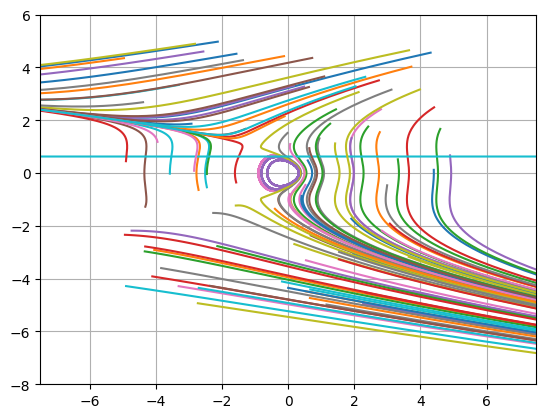

In [30]:
#GRAFICAMOS:
grid("on")

for i in 1:100 #Graficamos 100 curvas y damos las condiciones iniciales con ayuda de la función numeroaleatorio que definimos:
    a=numeroaleatorio(5);
    b=numeroaleatorio(5);
  
    vec=rungeKutta(f,tiempoList,[a,b]); #Resolvemos con Runge Kutta y vamos guardando los resultados en vec.
   
    #Ponemos los resultados de vec en las dos variables:
    listx1runge=map(x->x[1],vec);
    listx2runge=map(x->x[2],vec);
    
    #Para graficar le decimos de donde a donde porque por default nos da valores muy pequeños de los límites de x e y y no se distinguen las curvas:
    plot(listx1runge,listx2runge);
    axes()[:set_xlim]([-7.5,7.5])
    axes()[:set_ylim]([-8,6])
end

### Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$

Se tiene que:
$$\vec F=\left(\begin{array}{cc} F_{1} \\F_{2} \end{array} \right)=\left(\begin{array}{cc} y-y^3 \\-x-y^2 \end{array} \right)$$
Cuya matriz jacobiana es:
$$J=\left(\begin{array}{cc} \frac{\partial F_{1}}{\partial x} & \frac{\partial F_{1}}{\partial y} \\\frac{\partial F_{2}}{\partial x} & \frac{\partial F_{2}}{\partial y} \end{array} \right) =\left(\begin{array}{cc} 0 & 1-3y^2 \\-1 & -2y \end{array} \right)$$
Si $(x,y)=(0,0)$:
$$\Rightarrow J=\left(\begin{array}{cc} 0 & 1 \\-1 & 0 \end{array} \right)$$
Por lo tanto el determinanye $\Delta$ y la traza $\tau$ están dados como:
$$\Delta=1$$
$$\tau=0$$
Como $\Delta > 0$ y $\tau = 0$ entonces el $\vec 0$ representa un centro, lo cual también nos lo indica la gráfica anteior.

## EJERCICIO 2
Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol:
$${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$
* Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observa alguna estructura en particular?
* Usen $\mu=0.5$.
* Grafiquen varias trayectorias en los espacios $(x,t)$ y $(y=\dot x,t)$.

### SOLUCIÓN

In [32]:
#Definimos la función que vamos a resolver:
g(x,t)=[x[2],0.5*(1-x[1]^2)*x[2]-x[1]];

### ESPACIO FASE

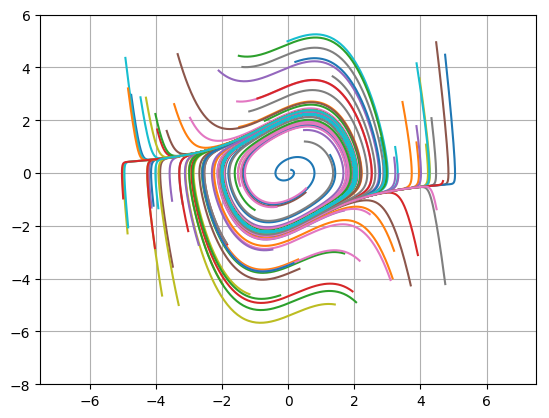

In [33]:
#Hacemos el mismo procedimiento para graficar:

grid("on")

for i in 1:100 #Graficamos 100 curvas y damos las condiciones iniciales con ayuda de la función numeroaleatorio que definimos:
    a=numeroaleatorio(5);
    b=numeroaleatorio(5);
  
    vec=rungeKutta(g,tiempoList,[a,b]); #Resolvemos con Runge Kutta y vamos guardando los resultados en vec.
   
    #Ponemos los resultados de vec en las dos variables:
    listx1runge=map(x->x[1],vec);
    listx2runge=map(x->x[2],vec);
    
    #Para graficar le decimos de donde a donde porque por default nos da valores muy pequeños de los límites de x e y y no se distinguen las curvas:
    plot(listx1runge,listx2runge);
    axes()[:set_xlim]([-7.5,7.5])
    axes()[:set_ylim]([-8,6])
end

### Gráfica $(x,y)$

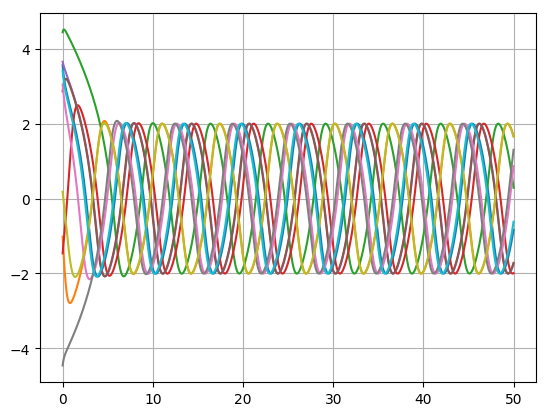

In [40]:
grid("on")

for i in 1:10 #Graficamos 10 curvas (para que se distinga la forma) y damos las condiciones iniciales con ayuda de la función numeroaleatorio que definimos:
    a=numeroaleatorio(5);
    b=numeroaleatorio(5);
  
    vec=rungeKutta(g,tiempoList,[a,b]); #Resolvemos con Runge Kutta y vamos guardando los resultados en vec.
   
    #Ponemos los resultados de vec en las dos variables:
    listx1runge=map(x->x[1],vec);
    listx2runge=map(x->x[2],vec);
    
    #Notamos que en este caso no es necesario indicar los límites de los ejes
    plot(tiempoList,listx1runge);
  
end

### Gráfica $(\dot{x},y)$

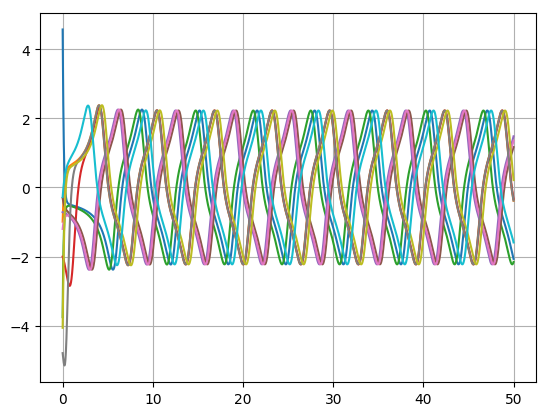

In [42]:
#Hacemos lo mismo que anteriormente pero con la lista listx2runge
grid("on")

for i in 1:10 #Graficamos 10 curvas (para que se distinga la forma) y damos las condiciones iniciales con ayuda de la función numeroaleatorio que definimos:
    a=numeroaleatorio(5);
    b=numeroaleatorio(5);
  
    vec=rungeKutta(g,tiempoList,[a,b]); #Resolvemos con Runge Kutta y vamos guardando los resultados en vec.
   
    #Ponemos los resultados de vec en las dos variables:
    listx1runge=map(x->x[1],vec);
    listx2runge=map(x->x[2],vec);
    
    #Notamos que en este caso no es necesario indicar los límites de los ejes
    plot(tiempoList,listx2runge);
  
end

## EJERCICIO 3
Graficar muchas trayectorias del sistema del ejercicio 1 en el espacio de fase. Utílicen rangos apropiados de acuerdo a donde vimos que estan los puntos fijos.

### SOLUCIÓN

Me parece que es lo mismo que se hizo en el ejercicio 1, desde antes moví los ejes de la gráfica o no se veía nada (si es a lo que se refiere el ejercicio).

## EJERCICIO 4
Hacer lo mismo para el sistema:
\begin{align*}
\dot x&= x+y-x (x^2+y^2)\\
\dot y &= y-x-y(x^2+y^2)
\end{align*}
Y comprobar numéricamente que hay un repulsor en $(0,0)$ y un ciclo límite (conjunto atractor) en $x^2+y^2=1$, para cotejar con lo que vimos en clase.

### SOLUCIÓN

In [59]:
#Se define la función para resolver (se hizo en clase)
H(x,t)=[x[1]+x[2]-x[1]*(x[1]^2+x[2]^2),-(x[1]-x[2])-x[2]*(x[1]^2+x[2]^2)];


#### GRÁFICA ESPACIO FASE

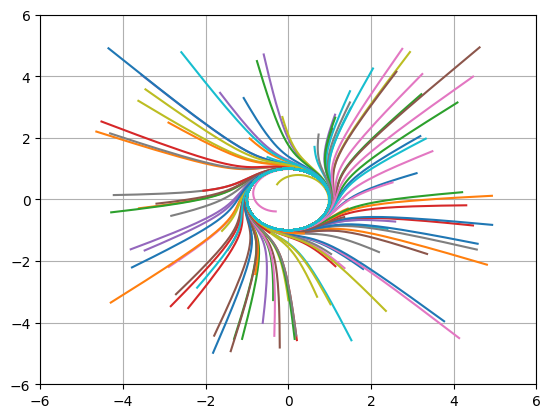

In [51]:
#Hacemos lo mismo que anteriormente:
grid("on")

for i in 1:100 #Graficamos 100 curvas y damos las condiciones iniciales con ayuda de la función numeroaleatorio que definimos:
    a=numeroaleatorio(5);
    b=numeroaleatorio(5);
  
    vec=rungeKutta(H,tiempoList,[a,b]); #Resolvemos con Runge Kutta y vamos guardando los resultados en vec.
   
    #Ponemos los resultados de vec en las dos variables:
    listx1runge=map(x->x[1],vec);
    listx2runge=map(x->x[2],vec);
    
    #Para graficar le decimos de donde a donde porque por default nos da valores muy pequeños de los límites de x e y y no se distinguen las curvas:
    plot(listx1runge,listx2runge);
    axes()[:set_xlim]([-6,6])
    axes()[:set_ylim]([-6,6])
end

### Gráfica $(x,y)$

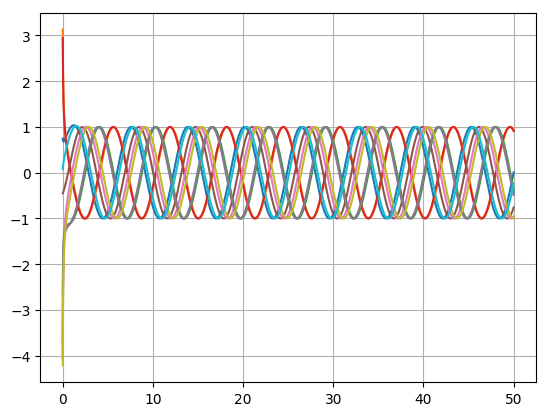

In [56]:
grid("on")

for i in 1:10 #Graficamos 10 curvas (para que se distinga la forma) y damos las condiciones iniciales con ayuda de la función numeroaleatorio que definimos:
    a=numeroaleatorio(5);
    b=numeroaleatorio(5);
  
    vec=rungeKutta(H,tiempoList,[a,b]); #Resolvemos con Runge Kutta y vamos guardando los resultados en vec.
   
    #Ponemos los resultados de vec en las dos variables:
    listx1runge=map(x->x[1],vec);
    listx2runge=map(x->x[2],vec);
    
    #Notamos que en este caso no es necesario indicar los límites de los ejes
    plot(tiempoList,listx1runge);
  
end

### Gráfica $(\dot{x},y)$

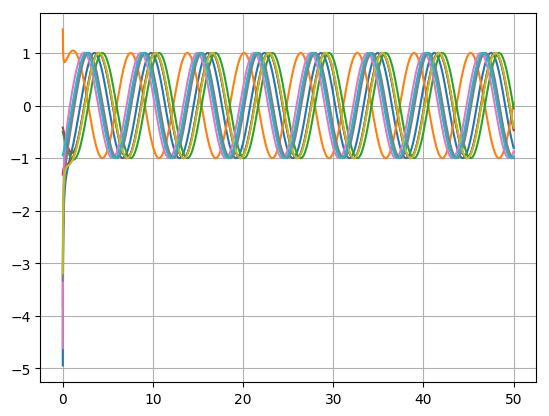

In [57]:
grid("on")

for i in 1:10 #Graficamos 10 curvas (para que se distinga la forma) y damos las condiciones iniciales con ayuda de la función numeroaleatorio que definimos:
    a=numeroaleatorio(5);
    b=numeroaleatorio(5);
  
    vec=rungeKutta(H,tiempoList,[a,b]); #Resolvemos con Runge Kutta y vamos guardando los resultados en vec.
   
    #Ponemos los resultados de vec en las dos variables:
    listx1runge=map(x->x[1],vec);
    listx2runge=map(x->x[2],vec);
    
    #Notamos que en este caso no es necesario indicar los límites de los ejes
    plot(tiempoList,listx2runge);
  
end